## Моделирование NPT ансамбля

   - Система: результат выполнения ноутбука `2021-05-05_nvt_heating.ipynb`;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Ансамбль: $NPT$;
   - Начальная температура: $T_i = 2.8~\varepsilon / k_B$;
   - Конечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Скорость нагревания: $v_T = 0~\varepsilon / k_B\tau$;
   - Конечное давление: $P_f = 22~\varepsilon / k_B$;
   - Термостат: MTTK;
   - Параметр термостата: $Q_T = 100.0$;
   - Параметр баростата: $Q_P = 200.0$;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: $5000$;
   - Равновесные характеристики системы рассчитывалась через каждые $500$ шагов;
   - Число ансамблей $N=2000$;
   - Подсчёт состоял из $2N+499$ шагов: $500$ на уравновешивание системы при фиксированной температуре и $2N-1$ на усреднение по ансамблям (к первому ансамблю относятся шаги с $1$ по $N$ шаг, ко второму - с $2$ по $N+1$ и т. д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые $N$ шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
CURRENT_DATA = '2021-05-18_npt'
PLOT_FILENAME_POSTFIX = 'npt'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, CURRENT_DATA)
PATH_TO_CURRENT_DATA

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data\\2021-05-18_npt'

In [5]:
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\plots\\2021-05-18_npt'

#### Параметры системы, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [6]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        setups.append(setup)
        
setups

[{'temperature': 2.74867, 'pressure': 22.11765, 'heating_velocity': 0.0},
 {'temperature': 2.7873, 'pressure': 22.02079, 'heating_velocity': 0.0},
 {'temperature': 2.80854, 'pressure': 21.88239, 'heating_velocity': 0.0},
 {'temperature': 2.81624, 'pressure': 21.98897, 'heating_velocity': 0.0},
 {'temperature': 2.8252, 'pressure': 22.06576, 'heating_velocity': 0.0},
 {'temperature': 2.83446, 'pressure': 21.93199, 'heating_velocity': 0.0},
 {'temperature': 2.86134, 'pressure': 21.94429, 'heating_velocity': 0.0},
 {'temperature': 2.9059, 'pressure': 4.76319, 'heating_velocity': 0.0},
 {'temperature': 2.98491, 'pressure': 21.78316, 'heating_velocity': 0.0},
 {'temperature': 3.0834, 'pressure': 21.90774, 'heating_velocity': 0.0},
 {'temperature': 3.93539, 'pressure': 21.1093, 'heating_velocity': 0.0}]

#### Инициализация объекта для обработки данных и вывод таблицы значений функции радиального распределения

In [7]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.rdf.data

,radius,setup_0,setup_1,setup_2,setup_3,setup_4,setup_5,setup_6,setup_7,setup_8,setup_9,setup_10
0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
607,6.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001307,NaN,NaN,NaN
608,6.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001229,NaN,NaN,NaN
609,6.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001003,NaN,NaN,NaN
610,6.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001648,NaN,NaN,NaN


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

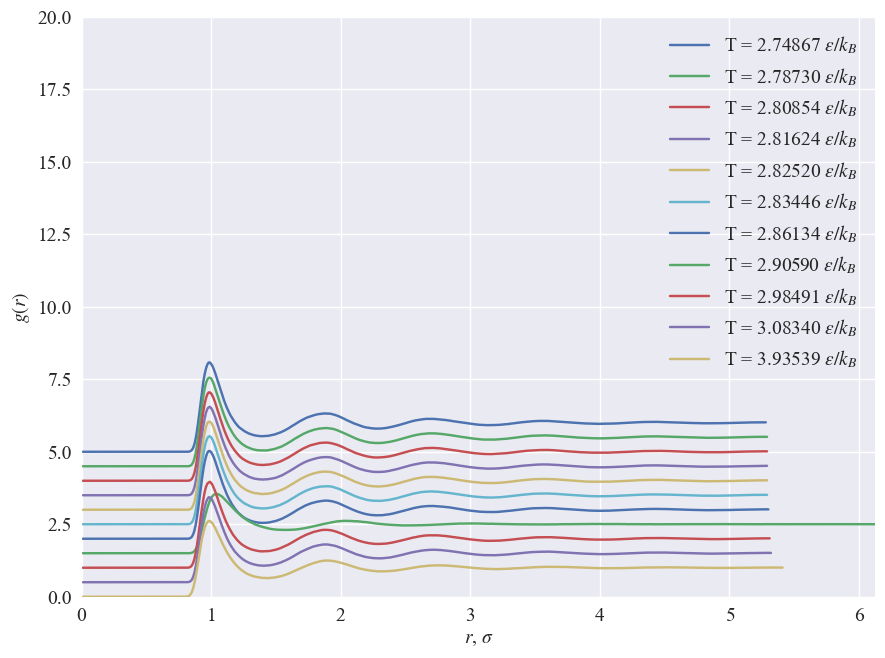

In [8]:
pp.plot_rdf(
    shift=0.5,
    left=0,
    right=6.125,
    bottom=0, 
    top=20,
    figsize=(10.24, 7.68),
)

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

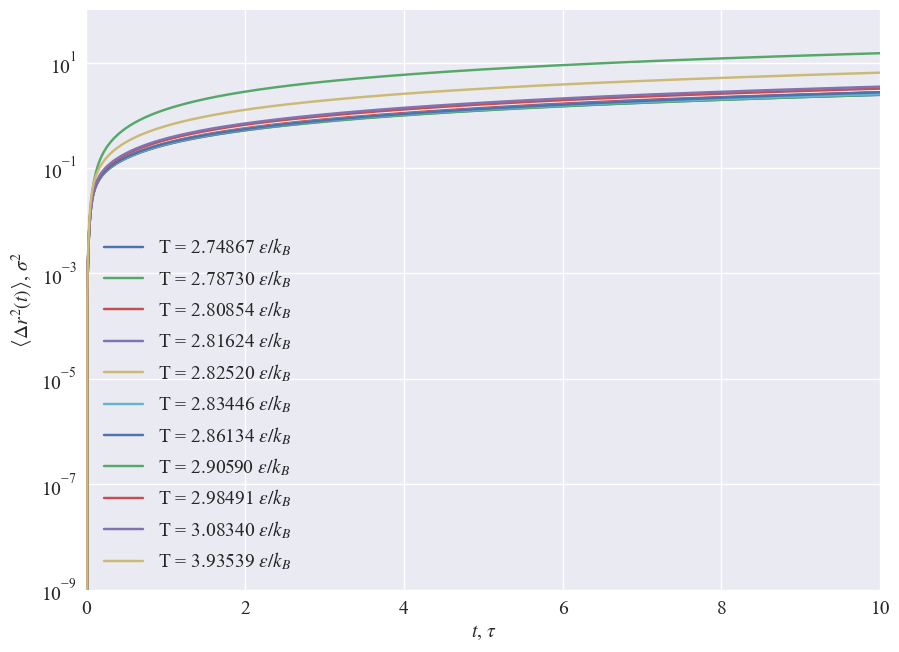

In [9]:
pp.plot_msd(
    left=0,
    right=10,
    bottom=1e-9, 
    top=1e2,
    y_scale='log',
    figsize=(10.24, 7.68),
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

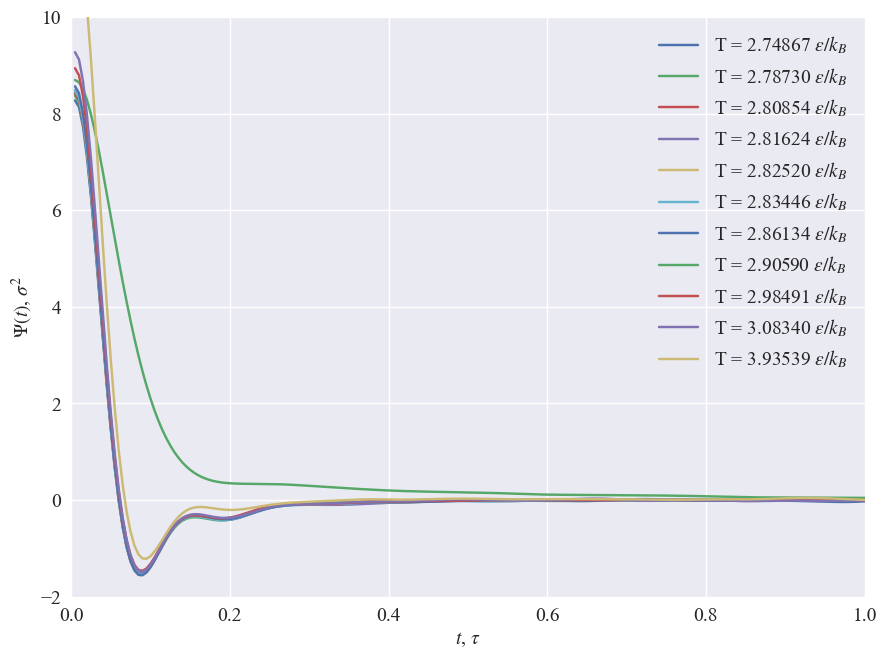

In [10]:
pp.plot_vaf(
    left=0,
    right=1,
    bottom=-2,
    top=10,
    figsize=(10.24, 7.68),
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

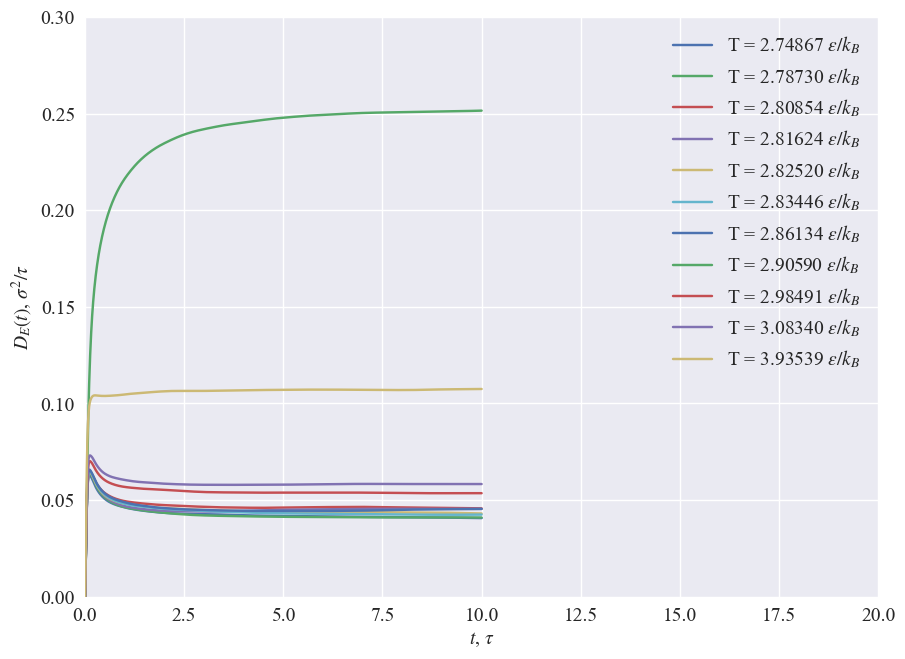

In [11]:
pp.plot_einstein_diffusion(
    left=0,
    right=20,
    bottom=0, 
    top=0.3,
    figsize=(10.24, 7.68),
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

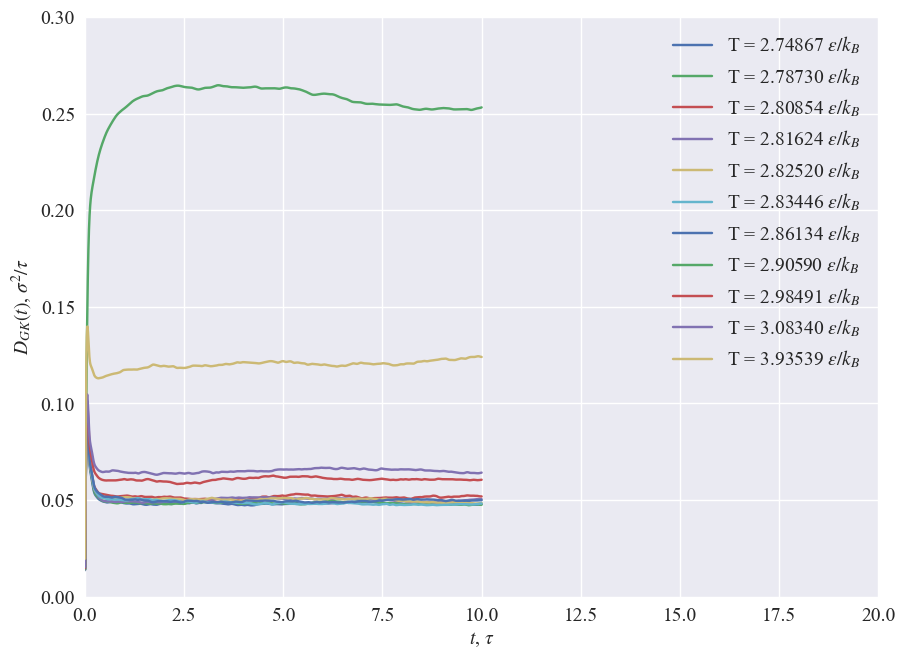

In [12]:
pp.plot_gk_diffusion(
    left=0,
    right=20,
    bottom=0, 
    top=0.3,
    figsize=(10.24, 7.68),
)

#### Температурная зависимость коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна

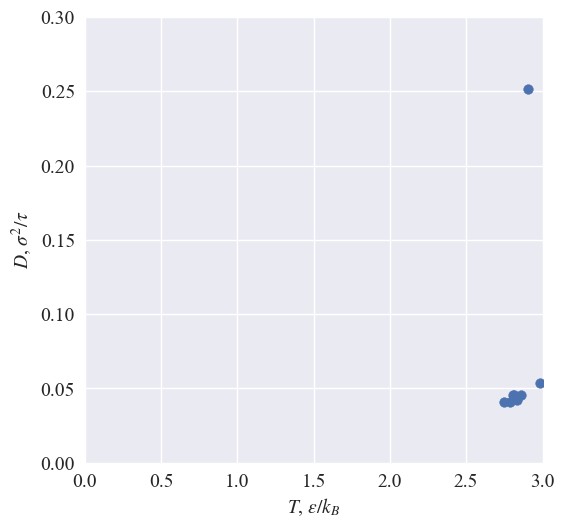

In [13]:
pp.plot_diffusion(
    left=0, 
    right=3,
    bottom=0, 
    top=0.3,
    figsize=(10.24, 7.68),
)

#### Таблица временных зависимостей характеристик системы

In [14]:
if 'time' not in pp.system_parameters.columns:
    pp.system_parameters['time'] = (pp.system_parameters.index + 1) * 0.005
pp.system_parameters

,time,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume
0,200.005,2.84075,4.76319,5980.3450,-4993.1050,987.2404,14127.785,0.0,0.0,1825.7017
1,200.010,2.94541,5.07086,6183.7534,-4904.9785,1278.7750,15242.820,0.0,0.0,1814.9673
2,200.015,3.04786,5.42114,6400.6704,-4789.3325,1611.3376,16546.800,0.0,0.0,1804.5476
3,200.020,3.15907,5.80122,6643.5596,-4660.8027,1982.7571,17943.074,0.0,0.0,1794.4598
4,200.025,3.28716,6.19404,6920.6987,-4536.0273,2384.6714,19322.377,0.0,0.0,1784.7128
...,...,...,...,...,...,...,...,...,...,...
4995,224.980,2.83982,21.95923,5767.7627,-3329.4140,2438.3484,66659.336,0.0,0.0,1186.9702
4996,224.985,2.81277,22.03896,5713.2476,-3273.4000,2439.8477,67051.590,0.0,0.0,1186.9600
4997,224.990,2.78822,22.09814,5671.4927,-3231.7036,2439.7893,67346.570,0.0,0.0,1186.9710
4998,224.995,2.77319,22.12456,5652.8500,-3214.0312,2438.8186,67479.700,0.0,0.0,1186.9974


#### Зависимость объёма системы от времени

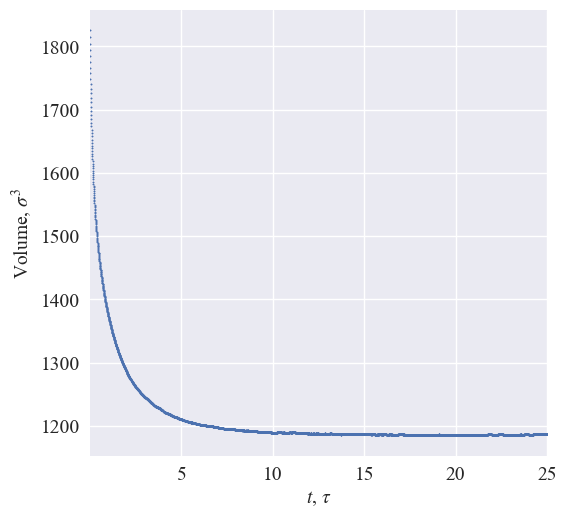

In [15]:
pp.plot_system_parameters(
    column_names=['volume',],
    y_label=r'Volume, $\sigma ^ 3$',
#     bottom=1835,
#     top=1840,
);

#### Зависимость температуры системы от времени

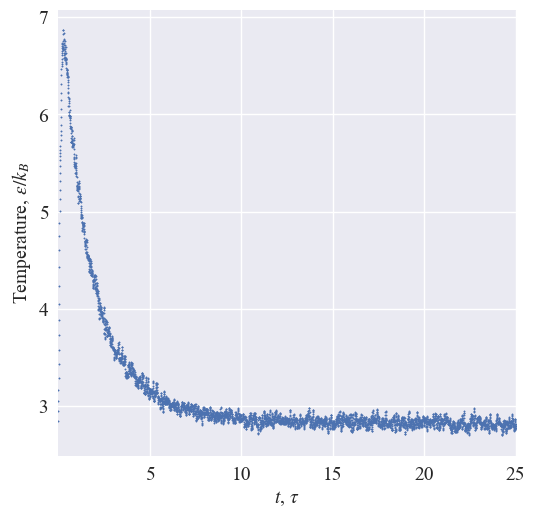

In [16]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
#     bottom=0,
#     top=3,
);

#### Зависимость давления системы от времени

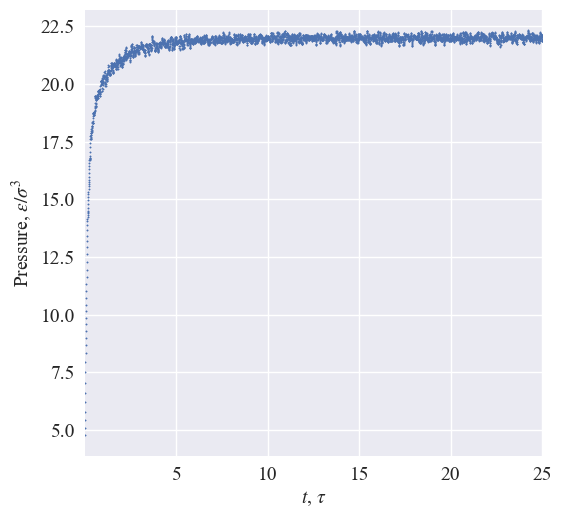

In [17]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
#     bottom=-3,
#     top=5,
);

#### Зависимость кинетической, потенциальной  и полной (внутренней) энергии системы от времени

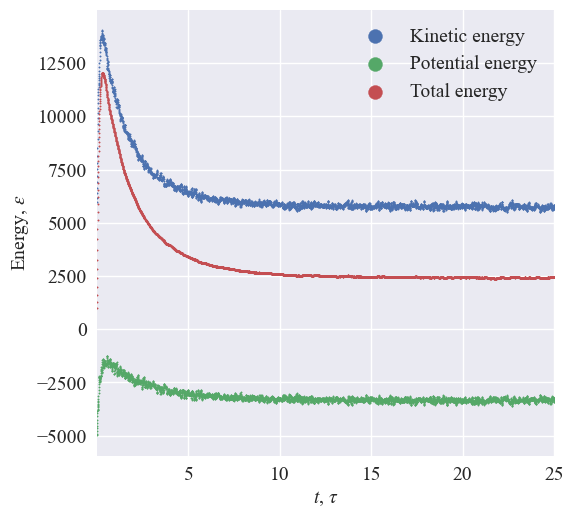

In [18]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
#     bottom=-10000,
#     top=8000,
    file_name_prefix='all_energies',
);

#### Вычисление термодинамических функций

In [19]:
pp.get_enthalpy();
pp.get_entropy();
pp.get_free_energy();
pp.get_gibbs_energy();

#### Зависимость энтропии системы от времени

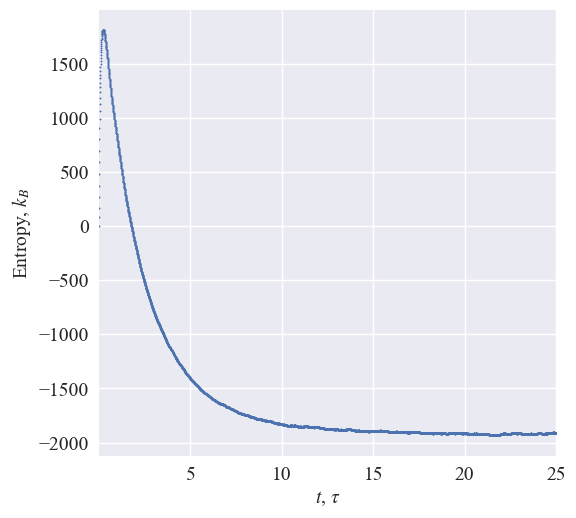

In [20]:
pp.plot_system_parameters(
    column_names=['entropy', ],
    y_label=r'Entropy, $k_B$',
#     bottom=-2,
#     top=2,
);

#### Зависимость энтальпии, внутренней энергии, свободной энергии Гельмгольца и энергии Гиббса от времени

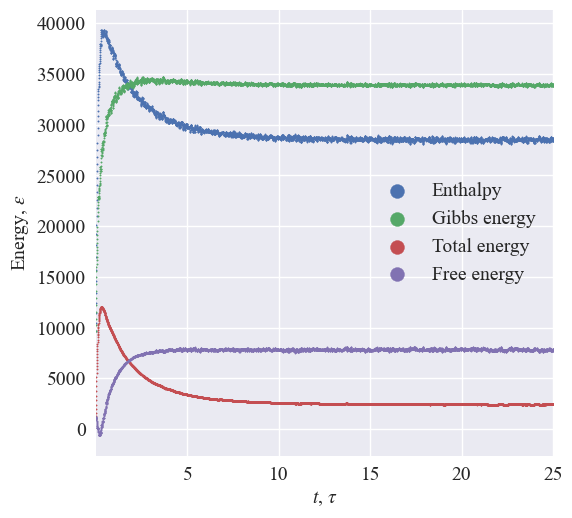

In [21]:
pp.plot_system_parameters(
    column_names=[
        'enthalpy', 
        'gibbs_energy', 
        'total_energy', 
        'free_energy',
    ],
    y_label=r'Energy, $\epsilon$',
    file_name_prefix='all_thermodynamic_functions',
#     bottom=100,
#     top=2000,
);

#### Зависимость внутренней энергии системы от энтропии

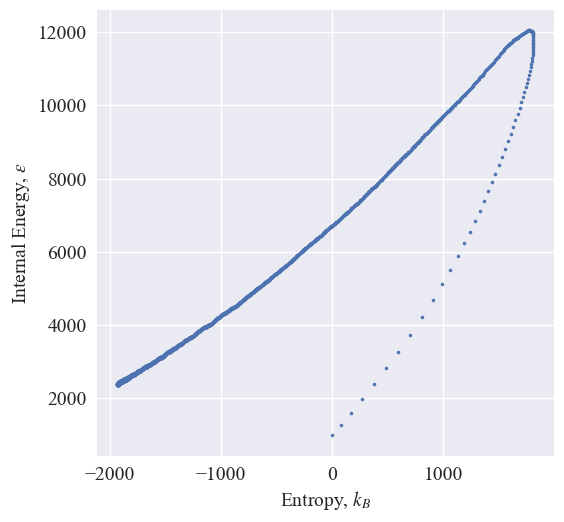

In [22]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['total_energy'], s=5);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость внутренней энергии системы от объёма

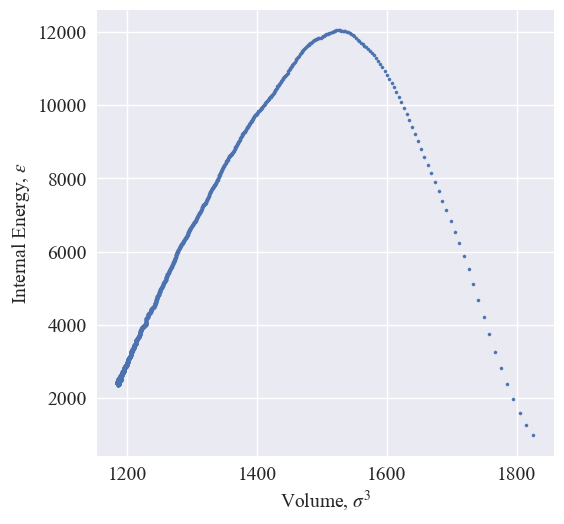

In [23]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['total_energy'], s=5);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от энтропии

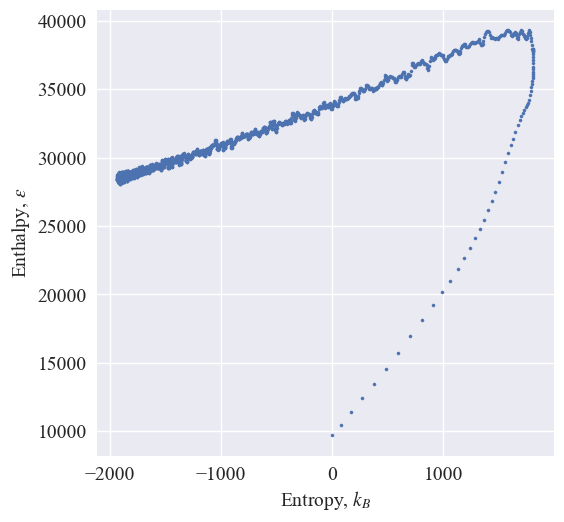

In [24]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['enthalpy'], s=5);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от давления

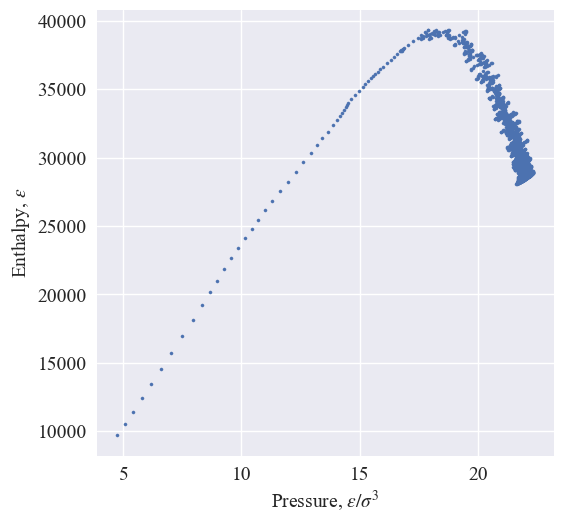

In [25]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['enthalpy'], s=5);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Enthalpy, $\epsilon$')
plt.show();

#### Зависимость свободной энергии Гельмгольца от объёма системы

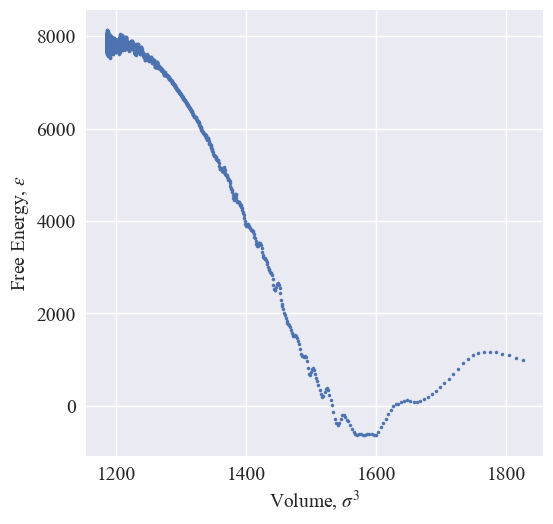

In [26]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['free_energy'], s=5);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость свободной энергии Гельмгольца от температуры системы

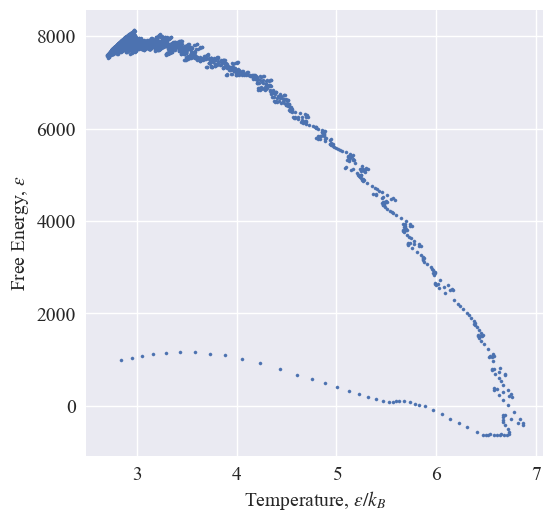

In [27]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['free_energy'], s=5);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от температуры системы

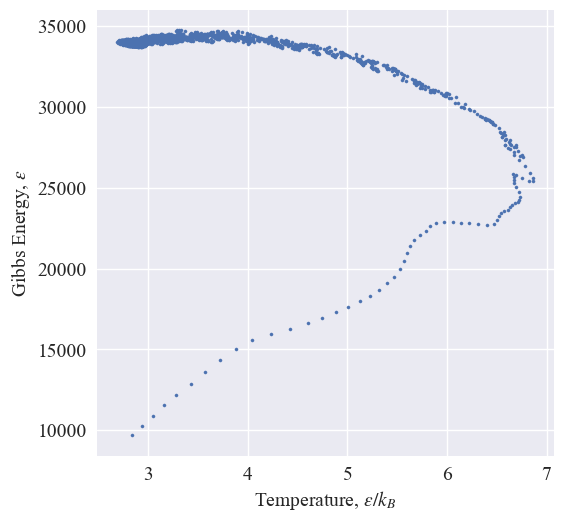

In [28]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['gibbs_energy'], s=5);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от давления системы

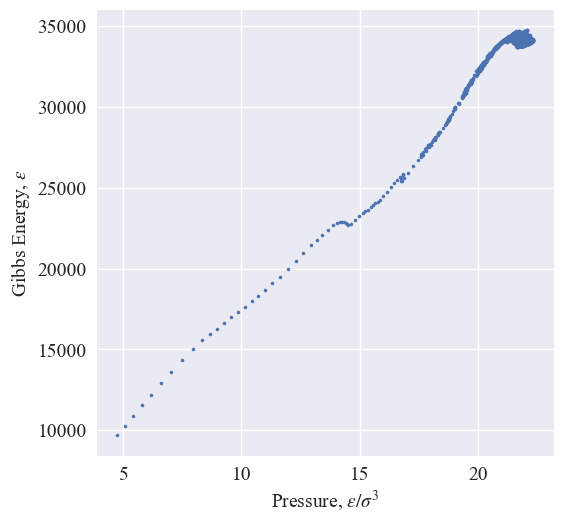

In [29]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['gibbs_energy'], s=5);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();